<a href="https://colab.research.google.com/github/dsmohiit/Pandas/blob/main/Basic_Time_Series_Analysis_(Google_Stock_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

# Time-Delta Object
### Represents a duration. The difference between two dates or time.

In [14]:
# Creating a Time-Delta object using Timestamp.
t1 = pd.Timestamp("26th Feb 2025 7:57:30")
t2 = pd.Timestamp("28th Feb 2025 10:55:30")

t2 - t1

Timedelta('2 days 02:58:00')

In [16]:
# Creating Time-Delta object, standalone.
pd.Timedelta(days= 2, hours= 10, minutes= 25, seconds= 10)

Timedelta('2 days 10:25:10')

In [18]:
# Arithematic Operation
pd.Timestamp("26th Feb 2025 7:57:30") + pd.Timedelta(days= 2, hours= 10, minutes= 25, seconds= 10)

Timestamp('2025-02-28 18:22:40')

# Time Series
##### A time series is a data set that tracks a sample over time. In particular, atime series allows one to see what factors influence certain variables from priod to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

#### Exapmles:
  * Financial Data.
  * Natural Data (Rainfall Measurement).
  * Event Data (Covid).
  * Medical Data (Heart Rate).

#### Types of Operations done on Time Series:
  * Time Series Analysis.
  * Time Series Forecasting.

In [20]:
df = pd.read_csv("/content/GOOGL.csv")

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [23]:
df["Date"] = pd.to_datetime(df["Date"])

In [27]:
# Setting date column as index.
df.set_index("Date", inplace= True)

In [29]:
# Fetching a single date.
df.loc["2020-12-31"]

,2020-12-31
Open,1.737270e+03
High,1.757500e+03
Low,1.736090e+03
Close,1.752640e+03
Adj Close,1.752640e+03
Volume,1.053500e+06


In [34]:
# Partial indexing, fetching data from Dec-2020.
df.loc["12-2020"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,1766.660034,1821.719971,1763.030029,1795.359985,1795.359985,1867500
2020-12-02,1795.359985,1832.739990,1785.170044,1824.969971,1824.969971,1471200
2020-12-03,1820.540039,1843.829956,1817.000000,1821.839966,1821.839966,1236400
2020-12-04,1820.219971,1829.500000,1813.589966,1823.760010,1823.760010,1027200
2020-12-07,1815.550049,1829.290039,1803.040039,1817.030029,1817.030029,1114400
2020-12-08,1808.520020,1815.969971,1791.280029,1811.329956,1811.329956,996800
2020-12-09,1810.359985,1828.369995,1762.000000,1777.859985,1777.859985,1586400
2020-12-10,1762.599976,1774.989990,1733.530029,1767.650024,1767.650024,1434400
2020-12-11,1760.000000,1777.310059,1752.739990,1774.800049,1774.800049,931400


In [38]:
# Create a month name, day name and quarter column.
df["month_name"] = df.index.month_name()
df["weekday_name"] = df.index.day_name()
df["quarter"] = df.index.quarter

df.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3


In [43]:
# Fetching data from 1st Jan 2020 to 1st Feb 2020, using slicing.
df.loc["2020-01-01":"2020-02-01"]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900,January,Thursday,1
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400,January,Friday,1
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400,January,Monday,1
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500,January,Tuesday,1
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700,January,Wednesday,1
2020-01-09,1421.930054,1428.680054,1410.209961,1419.790039,1419.790039,1660000,January,Thursday,1
2020-01-10,1429.469971,1434.939941,1419.599976,1428.959961,1428.959961,1312900,January,Friday,1
2020-01-13,1435.250000,1441.479980,1425.369995,1440.030029,1440.030029,1536500,January,Monday,1
2020-01-14,1440.000000,1442.630005,1427.770020,1430.589966,1430.589966,1303800,January,Tuesday,1


In [49]:
# Fetching for a partcular date from every year.
dates = pd.date_range(start= "2004-08-19", end= "2022-03-24", freq= pd.DateOffset(years= 1))
df[df.index.isin(dates)]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2005-08-19,140.635635,140.865860,139.949951,140.140137,140.140137,11074714,August,Friday,3
2008-08-19,245.460464,249.389389,243.558563,245.495499,245.495499,6086907,August,Tuesday,3
2009-08-19,220.215210,222.722717,219.499496,222.207214,222.207214,4505490,August,Wednesday,3
2010-08-19,240.745743,241.496490,233.858856,234.219223,234.219223,7842150,August,Thursday,3
2011-08-19,249.919922,257.692688,245.675674,245.705704,245.705704,10809180,August,Friday,3
2013-08-19,429.284271,436.436432,429.154144,433.258270,433.258270,3618178,August,Monday,3
2014-08-19,595.590027,597.809998,594.440002,597.109985,597.109985,1043200,August,Tuesday,3
2015-08-19,690.109985,700.200012,686.799988,694.039978,694.039978,2509700,August,Wednesday,3


<Axes: xlabel='Date'>

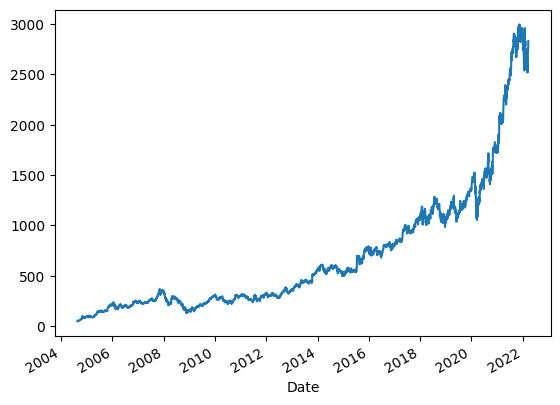

In [50]:
# Life Time Trend
df["Close"].plot()

<Axes: xlabel='Date'>

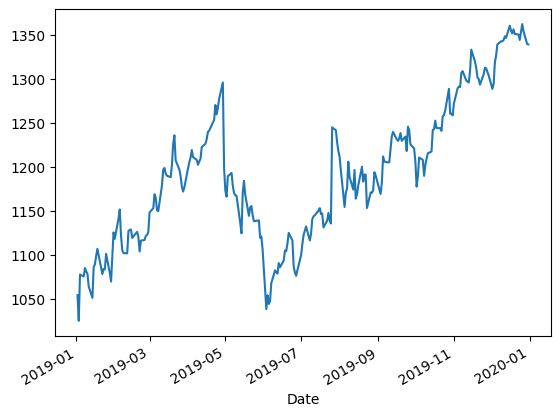

In [52]:
# Yearly Trend
df.loc["2019"]["Close"].plot()

<Axes: xlabel='Date'>

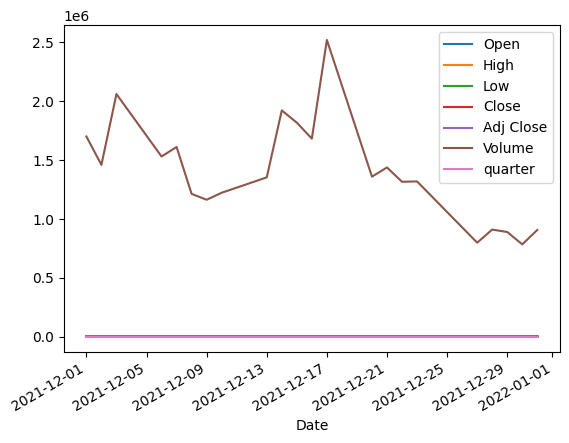

In [53]:
# Monthly Trend
df.loc["2021-12"].plot()

<ipython-input-59-6ee6f37cc3de>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.asfreq("Q")["Close"].plot()


<Axes: xlabel='Date'>

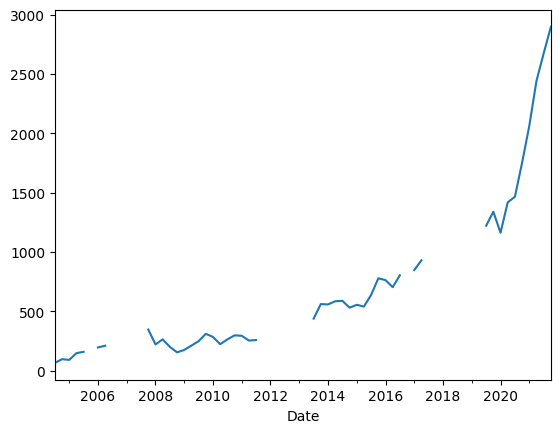

In [59]:
# Quarterly Trend
df.asfreq("Q")["Close"].plot()

In [57]:
# Frequency ---> Quarter
df.asfreq("Q")

<ipython-input-57-2e07efb46424>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.asfreq("Q")


,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-09-30,65.015015,66.216217,64.564568,64.864868,64.864868,13758028.0,September,Thursday,3.0
2004-12-31,99.714714,100.040039,96.376373,96.491493,96.491493,15321663.0,December,Friday,4.0
2005-03-31,89.064064,90.785789,88.908913,90.345345,90.345345,13523663.0,March,Thursday,1.0
2005-06-30,147.317322,149.614609,145.665665,147.222229,147.222229,30158611.0,June,Thursday,2.0
2005-09-30,157.267273,158.908905,156.301300,158.388382,158.388382,18284297.0,September,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2020-12-31,1737.270020,1757.500000,1736.089966,1752.640015,1752.640015,1053500.0,December,Thursday,4.0
2021-03-31,2054.399902,2086.260010,2047.000000,2062.520020,2062.520020,2128500.0,March,Wednesday,1.0
2021-06-30,2439.889893,2445.139893,2427.090088,2441.790039,2441.790039,1223700.0,June,Wednesday,2.0


# Resampling
#### Resampling involves changing the frequency for your time series observations.

#### There are two types of resampling:
* Upsampling
* Downsampling

<ipython-input-61-191d8e6cb3d6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Close"].resample("M").sum().plot()


<Axes: xlabel='Date'>

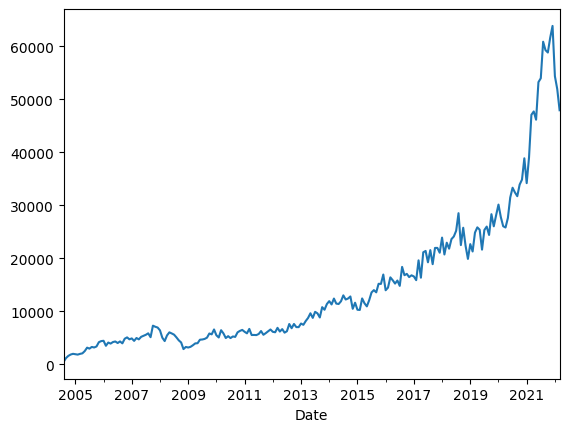

In [61]:
# Downsampling --> Where you decrease the frequency of the sample, like from days to month or from month to year.
df["Close"].resample("M").sum().plot()

# Rolling Window (Smoothing)
##### Time series data in original format can be very volatile, especially on smaller aggregation levels. The concept of rolling, or moving average is useful technique for smoothing time series data.

<Axes: xlabel='Date'>

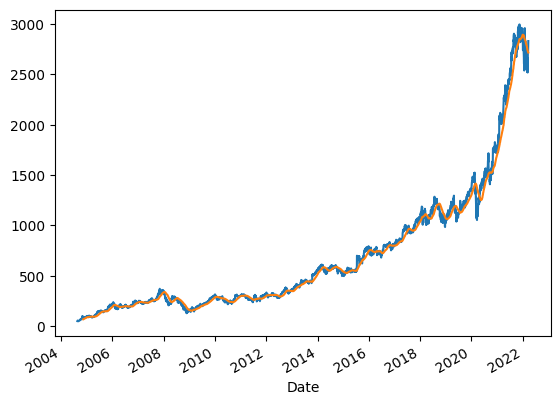

In [68]:
df["Close"].plot()
df["Close"].rolling(60).mean().plot()

# Shifting
##### The shift function in pandas is used to shift the entire series up or down by desired number of periods.

In [69]:
df["Close"].shift(1)

,Close
Date,
2004-08-19,NaN
2004-08-20,50.220219
2004-08-23,54.209209
2004-08-24,54.754753
2004-08-25,52.487488
...,...
2022-03-18,2676.780029
2022-03-21,2722.510010
2022-03-22,2722.030029


In [70]:
df["Close"].shift(-1)

,Close
Date,
2004-08-19,54.209209
2004-08-20,54.754753
2004-08-23,52.487488
2004-08-24,53.053055
2004-08-25,54.009010
...,...
2022-03-18,2722.030029
2022-03-21,2797.360107
2022-03-22,2765.510010
